# Práctica 2 - Aplicación de Cartas de NBA. Fecha de Entrega: 31 de Marzo

**NOTA**: el enunciado de la segunda práctica es bastante largo. Que no os abrume: la mayoría de funcionalidades no son complejas, y la dificultad consiste en integrar las distintas partes de forma incremental. Además, se os proporcionan la gran mayoría de _templates_ y todas las rutas que debéis implementar.

Haced una primera lectura superficial para entender lo que se os pide, y luego id desarrollando poco a poco la aplicación. Como es la primera vez que abordáis un proyecto de este estilo, os incluyo una sugerencia de qué pasos deberíais ir siguiendo para ir testeando poco a poco lo que vais probando. Acostumbraos a ir probando vuestro código de forma continua, de manera que los podáis delimitar los posibles problemas que vayan surgiendo. En la práctica, el testing (por ejemplo, _test unitarios_) y la refactorización de código son claves para hacer que este tipo de proyectos sean escalables.

## Enunciado

¡Tenemos unas noticias espectaculares! Gracias a sus contactos en el mundo del baloncesto, Clara ha conseguido un contrato para desarrollar la nueva aplicación web *NBA Legends*, un juego de cartas online de coleccionismo de jugadores de la NBA. Podremos coleccionar las cartas de nuestros jugadores favoritos y organizar ligas con nuestros amigos, de tal manera que ganaremos puntos en función del desempeño de nuestras cartas de jugador. De acuerdo a lo hablado con el cliente, nuestra aplicación debe contener las siguientes funcionalidades:

* **Lista de Jugadores**: La aplicación debe mostrar la lista de todos los jugadores de la temporada actual. Por cada uno de estos jugadores, se mostrará su nombre, su imagen y su equipo. Si hacemos click sobre su nombre, accederemos a la información completa de ese jugador, que incluye: su nombre, su imagen, su posición, su altura, su peso y su puntuación como jugador. También se incluye el histórico de partidos (descrita a continuación). La información de esta tabla nos la proporcionan desde los servicios informáticos de la NBA.

* **Histórico de Partidos**: por cada jugador y cada partido en el que jugó su equipo, se almacena la información de ese jugador en el partido: número de minutos que jugó (puede ser 0), el número de puntos que anotó y la puntuación de cómo jugó ese jugador en el partido. La puntuación de un jugador se determina como la media aritmética de los últimos 5 partidos, considerando que un jugador puntúa 0 si no juega en un partido. Además, de cada partido, almacenamos el equipo local, el equipo visitante, la fecha, si ganó o no el equipo local, y una URL a los momentos destacados del partido. 

* **Cartas**: Cada jugador tiene asociada una carta. Una carta tiene asociada una _rareza_, que determina con qué probabilidad se obtiene. Las cartas tienen rareza *mítica*, *rara*, *infrecuente* o *comun*, las cuales tienen una probabilidad de salir del 5%, 15%, 30% y del 50%, respectivamente. La rareza se tiene en cuenta para sortear con qué probabilidad un usuario puede obtener un jugador. Los usuarios pueden recibir una carta diaria al máximo en cada liga que participe (se explica más adelante), salvo el día de su cumpleaños, en el que obtiene una carta aleatoria de cada rareza. Cuando un usuario se autentifica en la aplicación, si es la primera vez que accede ese día, se realiza el sorteo de cartas en las ligas que participa. También se le asigna aleatoriamente una carta de inicio cuando se une a una liga. Las cartas se corresponden con los perfiles de los jugadores.

* **Gestión de Usuarios**: El sistema admitirá usuarios, quienes podrán crear o registrarse en ligas. Del usuario, queremos saber un email (que no debe pertenecer a otra cuenta), su edad y su contraseña. Solo se permite el registro a mayores de 14 años. Un usuario puede participar en un total de 10 ligas (incluyendo las que cree). Cuando llega a este tope, un usuario no puede crear nuevas ligas.

* **Ligas**: las ligas permiten a distintos usuarios retarse mutuamente. Hay ligas con contraseña para unirse y ligas públicas, en las que cualquiera puede entrar. Además, una liga permite un número máximo de usuarios, el cual se especifica al crear la liga. 

* **Perfiles de Usuario**:  En el perfil de los usuarios, se ve el listado de ligas en las que participa. 

* **Listado de Ligas**: cualquier usuario (registrado o no registrado) puede acceder a la lista de ligas que existen actualmente. En las ligas en las que el usuario no participa, solo ve la información general: el nombre de la liga, si está abierta o no, el número de participantes y el límite de participantes. En las ligas en las que el usuario participa, se puede hacer click en la lista para obtener más detalles. En esta página se muestra la información de la liga, y su lista de participantes asociadas, ordenados por puntuación. Por cada participante, se muestra su nombre (al que se puede hacer click y acceder a su perfil) y su puntuación en esa liga.

* **Funcionamiento de las Ligas**: los participantes de las ligas tienen una puntuación asociada que se actualiza diariamente. Para actualizarla, se suma la puntuación de todas las cartas que tiene. Si un usuario tiene cartas repetidas, esa carta solo puntúa una vez. El recómputo de la puntuación de los usuarios se actualiza en el lado del servidor directamente.

    1. Ejemplo: Ana y Félix participan en una liga. Ana suma 2 puntos en la liga, y Félix tiene 7 puntos. Ana tiene una carta por valor de 2 y otra carta con valor de 5, mientras que Félix tiene una carta de 7 puntos y otra de 1. Al actualizar las puntuaciones, Ana pasará a tener 9 puntos (2 puntos iniciales + 9 puntos de las cartas) y Félix pasará a tener 15 puntos (7 puntos iniciales + 8 puntos de sus cartas).

* **Funciones de Administrador**: Por último, queremos tener un script independiente que nos permita introducir la información y los resultados de los partidos en nuestra base de datos para la tabla de partidos y para el histórico de puntuaciones. Por otro lado, queremos poder actualizar las puntuaciones de los usuarios en las distintas ligas diariamente. Estas dos funciones se invocarán de forma manual por un administrador. Se podrían configurar para que se invocasen de forma periódica, pero queda fuera del ámbito de este curso. Estas funciones **NO** se deben poder invocar desde la página web.

## Modelos de Datos

Hemos generado el siguiente modelo Entidad-Relación simplificado (no se incluyen los atributos de las entidades y relaciones)

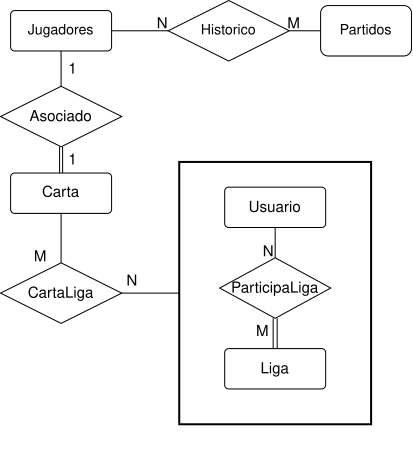

del cual hemos obtenido el siguiente modelo relacional:

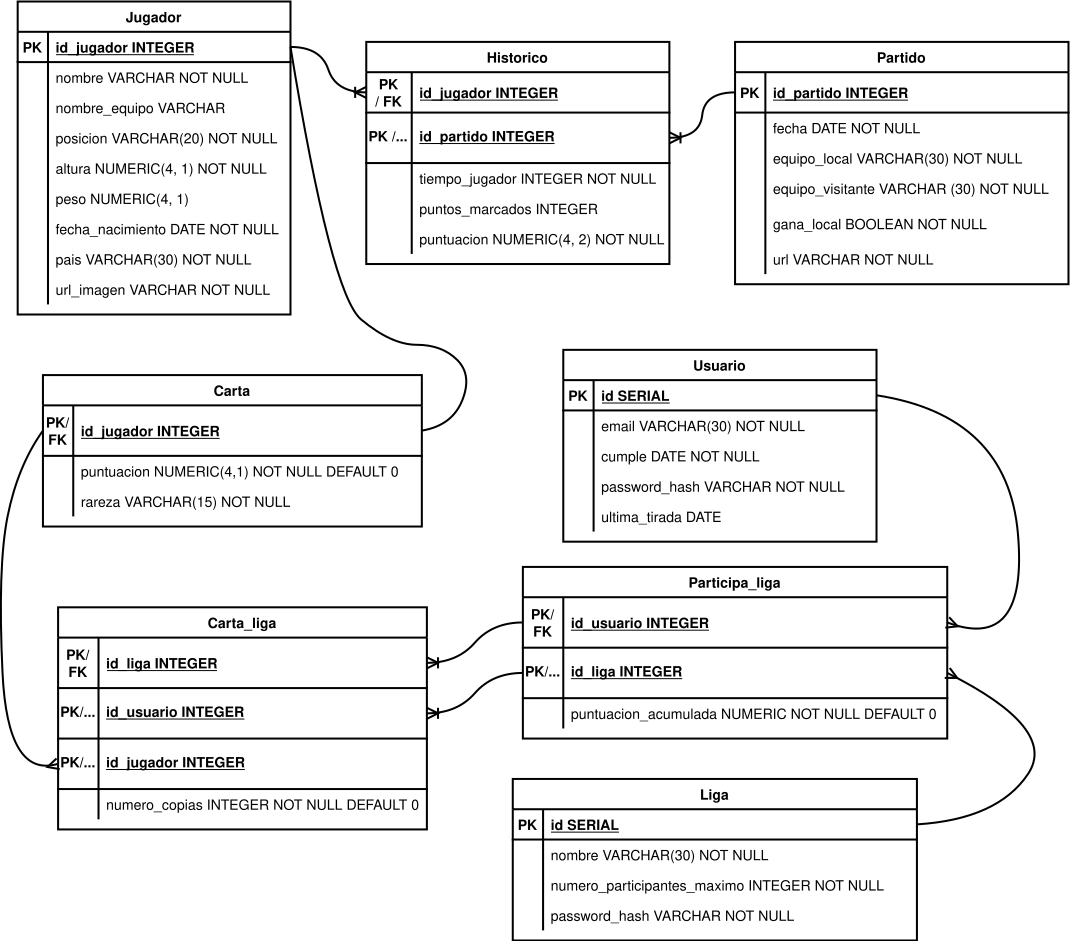

Algunos comentarios relevantes sobre el modelo:

* Los ids de `Partido`, `Historico` y `Jugador` no son `serial`. Estos ids nos lo han proporcionado desde la NBA, y son los mismos que utilizan ellos internamente.

* Los nombres de las tablas están en singular porque son los nombres por defecto generados a partir de las clases de la ORM. Por ejemplo, la clase `CargaLiga` tiene asociada el nombre de tabla `carta_liga`. Seguid la convención de _upper camel case_ a la hora de nombrar vuestras clases en el modelo.

* Guardamos los jugadores y las cartas como dos tablas separadas por comodidad a la hora de trabajar con las ligas, pero se podría haber incluido los atributos de las cartas dentro de los jugadores. Además, pueden existir jugadores que no tengan aún una carta asociada.

* El campo `nombre_equipo` de un jugador puede ser nulo si ese jugador no tiene un equipo asociado.

* Para detectar si un usuario tiene una tirada diaria disponible en una liga concreta, almacenamos la última fecha en la que obtuvo un jugador dentro de esa liga. Cada vez que se obtiene un jugador, ese campo se actualiza para no obtener otro en el mismo día.

* Almacenamos el cumpleaños del usuario para saber la edad.

* Para saber si una liga es pública o privada, almacenamos el _hash_ de la contraseña y permitimos que sea nula. En caso de que sea nula, se tratará de una liga pública.

## Enrutado

El enrutado se encuentra descrito en el archivo `rutas.py`. Todas las rutas y sus métodos HTTP asociados están definidos, así que solo hay que seguir las indicaciones de los comentarios para implementar esos métodos. En los templates se indica qué variables se deben suministrar y en qué formato.

## Restricciones de Diseño y Planteamiento de la Práctica

Tenéis **libertad** para el diseño de la página en los templates que tenéis que implementar vosotros (que son 2). Os recomiendo que sigáis el diseño similar a la aplicación de ejemplo, ya que la funcionalidad es muy parecida en ambos casos. 

Lo más importante es que todas las funcionalidades estén asociadas a las rutas pertinentes, y que el acceso al modelo de datos sea **eficiente**. Esto implica cargar la información imprescindible en cada caso, y hacerlo utilizando el menor número de consultas posibles. Si utilizáis relaciones, tenéis que tener cuidado con la carga de relaciones _lazy_ cuando necesitamos acceder a toda la información de golpe. Además, para aquellos casos en los que se espere una gran cantidad de información a procesar, deberéis utilizar **paginaciones** para mostrar los resultados en distintas páginas. 

## ¿Cómo abordar la práctica?

El primer paso consiste en identificar las entidades principales del sistema: **Jugadores**, **Usuarios**, **Partidos**, **Históricos de Partidos**, **Ligas**, **Participaciones en Ligas**, **Cartas** y **Cartas asociada a un Jugador y a una Liga**. Estas entidades tienen asociadas unas funcionalidades más o menos delimitadas, de tal manera que pensar en una entidad nos ayuda a su vez a focalizarnos en una parte de la aplicación. La siguiente pregunta que nos podríamos hacer es:

##### ¿En qué orden tiene sentido abordar la funcionalidad?

Los jugadores no requieren de login ni de información externa, solo necesitamos acceder a su información. Lo mismo para los usuarios, pero gestionar la autenticación es más complejo. Obviamente, las ligas y cartas interactúan con estos elementos. Tiene sentido empezar, por tanto, por los **Jugadores**. Además, como la información de esta tabla ya nos la proporcionan, podemos probar que la lista de jugadores se muestra correctamente sin tener que manipular información. 

### Paso 1. Mostrar la Lista de Jugadores

Una vez tenemos la información básica de los jugadores, la siguiente información que está muy relacionada y no es complicada de implementar es el histórico de partidos, usando también la información de los partidos. El histórico de partidos se actualiza con las funciones de administrador, pero por ahora, nos centraremos en utilizar la información que ya tenemos. Como el histórico de partidos se muestra dentro del perfil de un jugador, primero generaremos el _template_ para los perfiles de jugadores y luego incluiremos el histórico de partidos en esta página. Esto se resume en los siguientes pasos:

### Paso 2. Generar el Perfil de un Jugador y Vincularlo desde el Listado de Jugadores

### Paso 3. Gestionar el Histórico de Partidos dentro de un Perfil

En el siguiente paso, tenemos varias opciones de cómo proceder. La funcionalidad de los jugadores está relativamente cerrada (hasta que abramos el melón de las cartas y las puntuaciones). Podemos o bien seguir con los usuarios, o bien con las ligas o con las cartas. Como las cartas y las ligas están asociadas a usuarios, es más sencillo crear primero los usuarios y diseñar los mecanismos de log-in.

### Paso 4. Gestionar el Log-In de Usuarios

Una vez hemos gestionado el Log-In, el resto de funcionalidades del sistema son más o menos directas. Es mejor empezar primero con todo lo relacionado con las ligas, para finalmente añadir la funcionalidad de las cartas.

### Paso 5. Implementar las rutas asociadas con Ligas

### Paso 6. Implementar las rutas asociadas con Cartas

### Paso 7. Implementar las Funciones de Administrador

Implementaremos las funciones de añadir resultados y de computar los puntos de todos los usuarios en todas las ligas. Con toda la infraestructura que hemos montado anteriormente, estas funciones nos permiten hacer testing para comprobar que nuestra aplicación se actualiza con distintos datos que se añadan.


### Paso 8. Revisar el Acceso de Datos

Por último, vamos a comprobar que efectivamente la aplicación funciona de la forma más eficiente posible. Para ello, probaremos las distintas funcionalidades del sistema y revisaremos que las consultas que se realizan son **eficientes**. Esto implica comprobar los siguientes parámetros:

* ¿Estoy cargando más información de la cuenta para hacer una consulta? (Tenéis que analizar los templates y ver a qué información se accede). Si hay información que no necesito cargar de un objeto, podéis utilizar el método `load_only` para restringir qué campos se cargan.

* ¿Puedo agrupar distintas consultas de una función de vista en una misma consulta, para así evitar tener que acceder a la base de datos? Aquí podéis pensar si podemos hacer carga de relaciones más eficiente.

Comprueba también que todas las funcionalidades se ajustan a las que pide el enunciado. Con esto, ya habrás terminado :)

## Entrega de la Práctica

Subid un archivo `*.zip` con el código de vuestra aplicación. Incluid un archivo `alumnos.txt` con el nombre y apellidos de los participantes de la práctica, y el grupo.